<a href="https://colab.research.google.com/github/tushar2013/intellipaat_projects/blob/main/csgo_handson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Steps for the project

- load necessary libraries
- load data into dataframe
- EDA
  - check whether data is balanced or not(using target column)
  - check null values
  - check duplicates
  - check outliers
- fearure engineering
  - encode object and bool columns
  - standardize data by rescaling
- feature extraction using lda or pca
- model selection
- model evaluation
- model deployement

In [2]:
!pip install pycaret
from pycaret.classification import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.7/169.7 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 57.2 MB/s eta 0:00:00
   ━━━━━━

In [1]:
import pandas as pd
data = pd.read_csv('/content/csgo_round_snapshots.csv')
data.head(3)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [2]:
classification_setup = setup(data = data, target = 'round_winner')

,Description,Value
0,Session id,1907
1,Target,round_winner
2,Target type,Binary
3,Target mapping,"CT: 0, T: 1"
4,Original data shape,"(122410, 97)"
5,Transformed data shape,"(122410, 104)"
6,Transformed train set shape,"(85687, 104)"
7,Transformed test set shape,"(36723, 104)"
8,Numeric features,94
9,Categorical features,1


In [ ]:
best_model = compare_models()

In [2]:
# encoding object and bool data

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for column in data.columns:
    if data[column].dtype == 'object' or data[column].dtype == 'bool':
        data[column] = label_encoder.fit_transform(data[column])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int64  
 4   bomb_planted                  122410 non-null  int64  
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [5]:
# creating indedependent and depenedent datasets
X = data.drop(columns=['round_winner'])
y = data['round_winner']

In [12]:
# splitting data into test train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# printing shapes after test and train split
print(f'X_train.shape :: {X_train.shape}')
print(f'X_test.shape :: {X_test.shape}')
print(f'y_train.shape :: {y_train.shape}')
print(f'y_test.shape :: {y_test.shape}')

X_train.shape :: (97928, 96)
X_test.shape :: (24482, 96)
y_train.shape :: (97928,)
y_test.shape :: (24482,)


In [15]:
# sacling the data to remove bias
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)

In [17]:
# feature extraction using LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(scaled_x_train, y_train)

LinearDiscriminantAnalysis()

In [18]:
lda.transform(scaled_x_test)

array([[-0.31066701],
       [ 0.16160545],
       [-2.19522227],
       ...,
       [ 2.91456775],
       [-1.65102466],
       [ 0.99528168]])

In [19]:
# lda cofficients to obtain importance of each feature
import numpy as np
lda_coefficiants = np.exp(np.abs(lda.coef_))
lda_coefficiants

array([[1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
        1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
        1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
        1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
        1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
        1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
        1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
        1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
        1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
        1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
        1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
        1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
        1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
        1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
        1.0223457 , 1.00392739, 1.00787732, 1.06

In [20]:
# reducing lda coefficiants from 2d to 1d
lda_coefficiants.flatten()

array([1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
       1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
       1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
       1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
       1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
       1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
       1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
       1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
       1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
       1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
       1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
       1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
       1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
       1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
       1.0223457 , 1.00392739, 1.00787732, 1.06560713, 1.02458

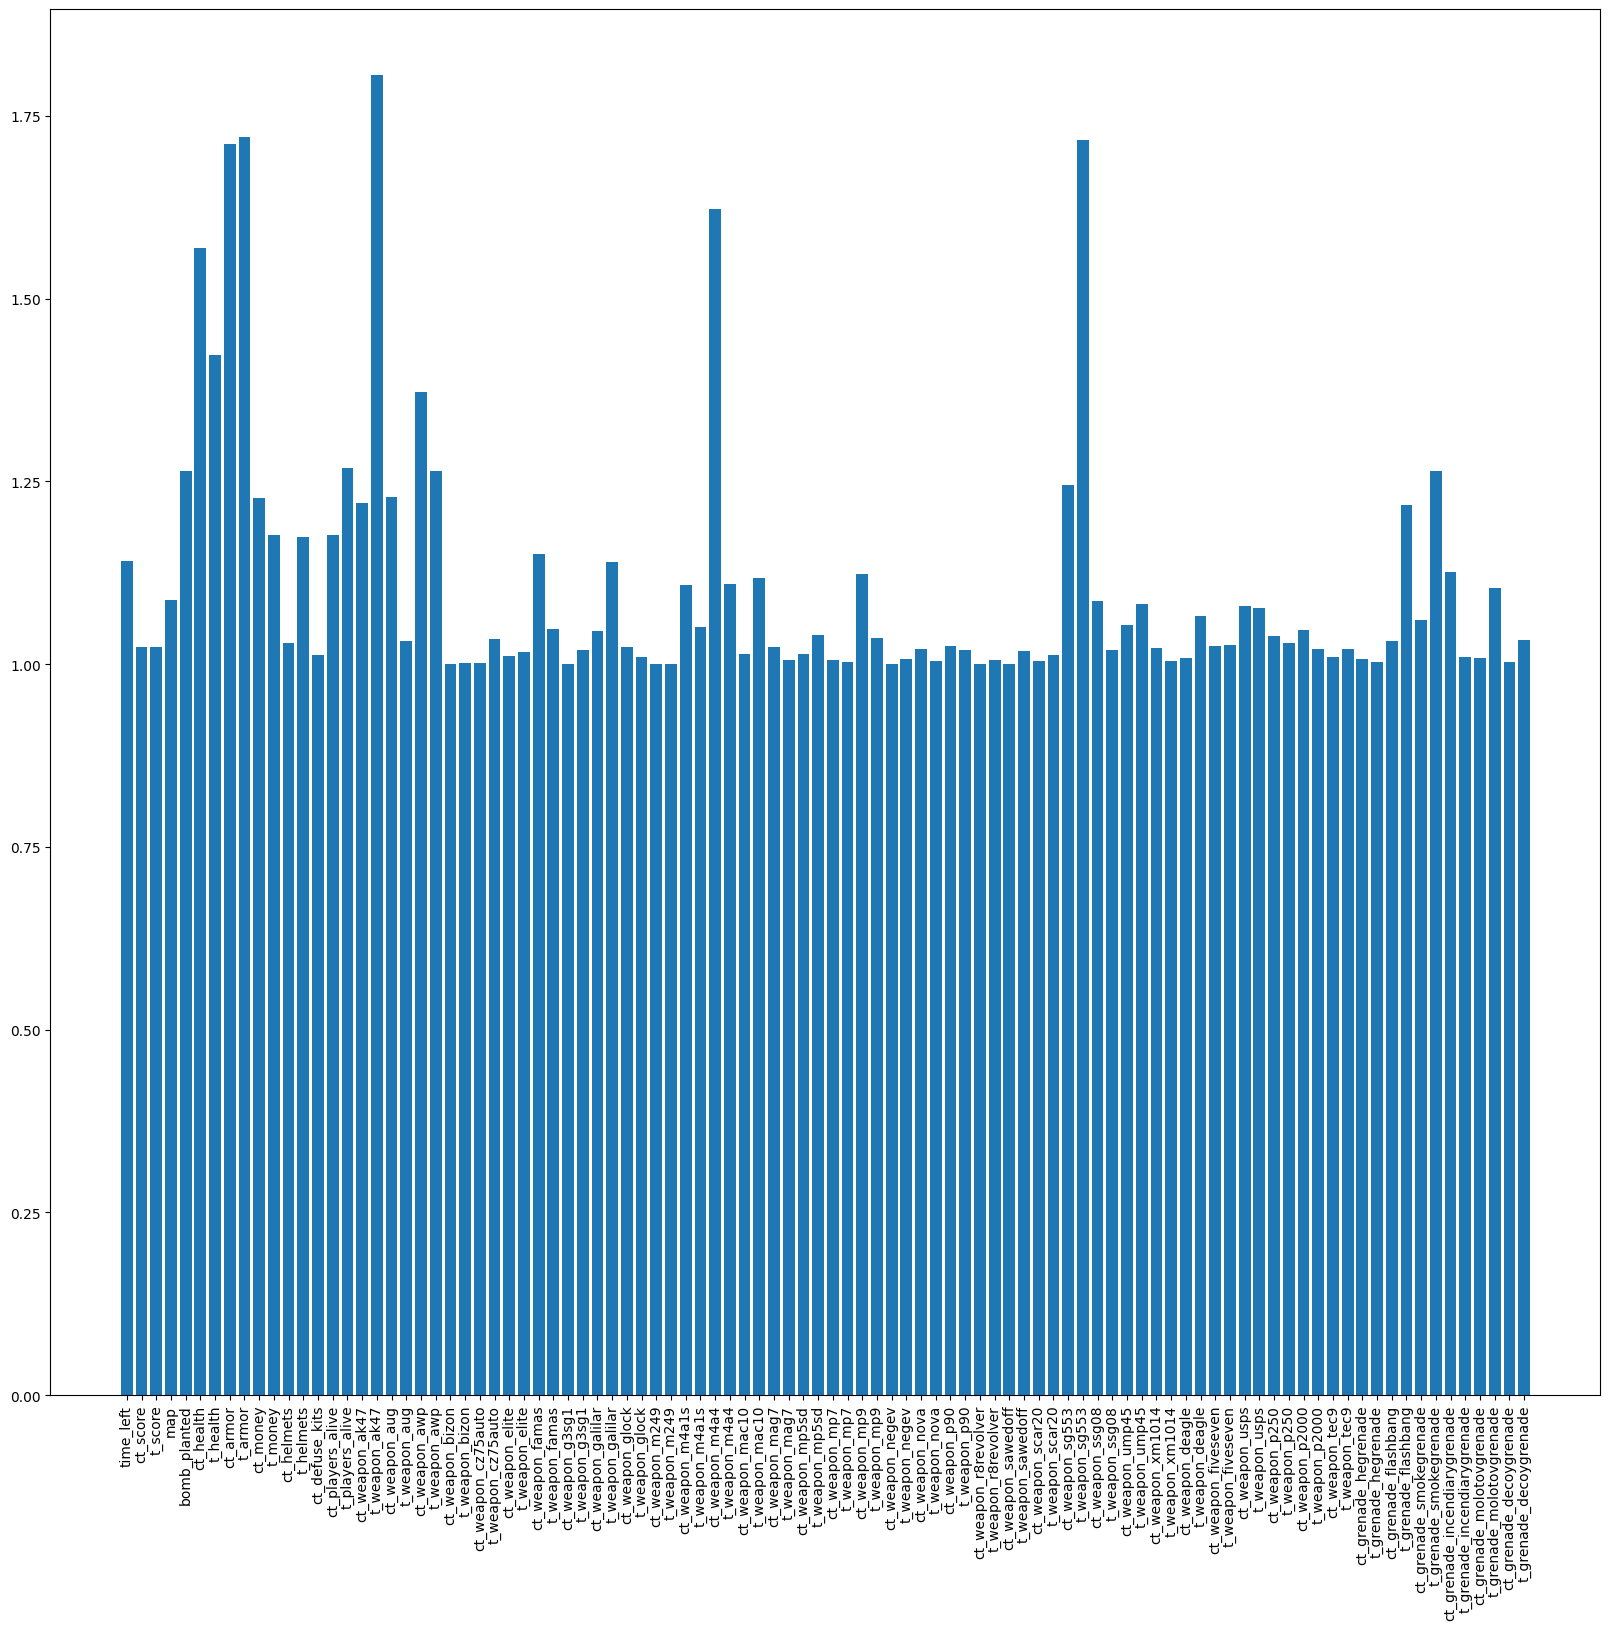

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 18))
plt.bar([x for x in range(len(X.columns))], lda_coefficiants.flatten())
plt.xticks([x for x in range(len(X.columns))], X.columns, rotation='vertical')
plt.show()

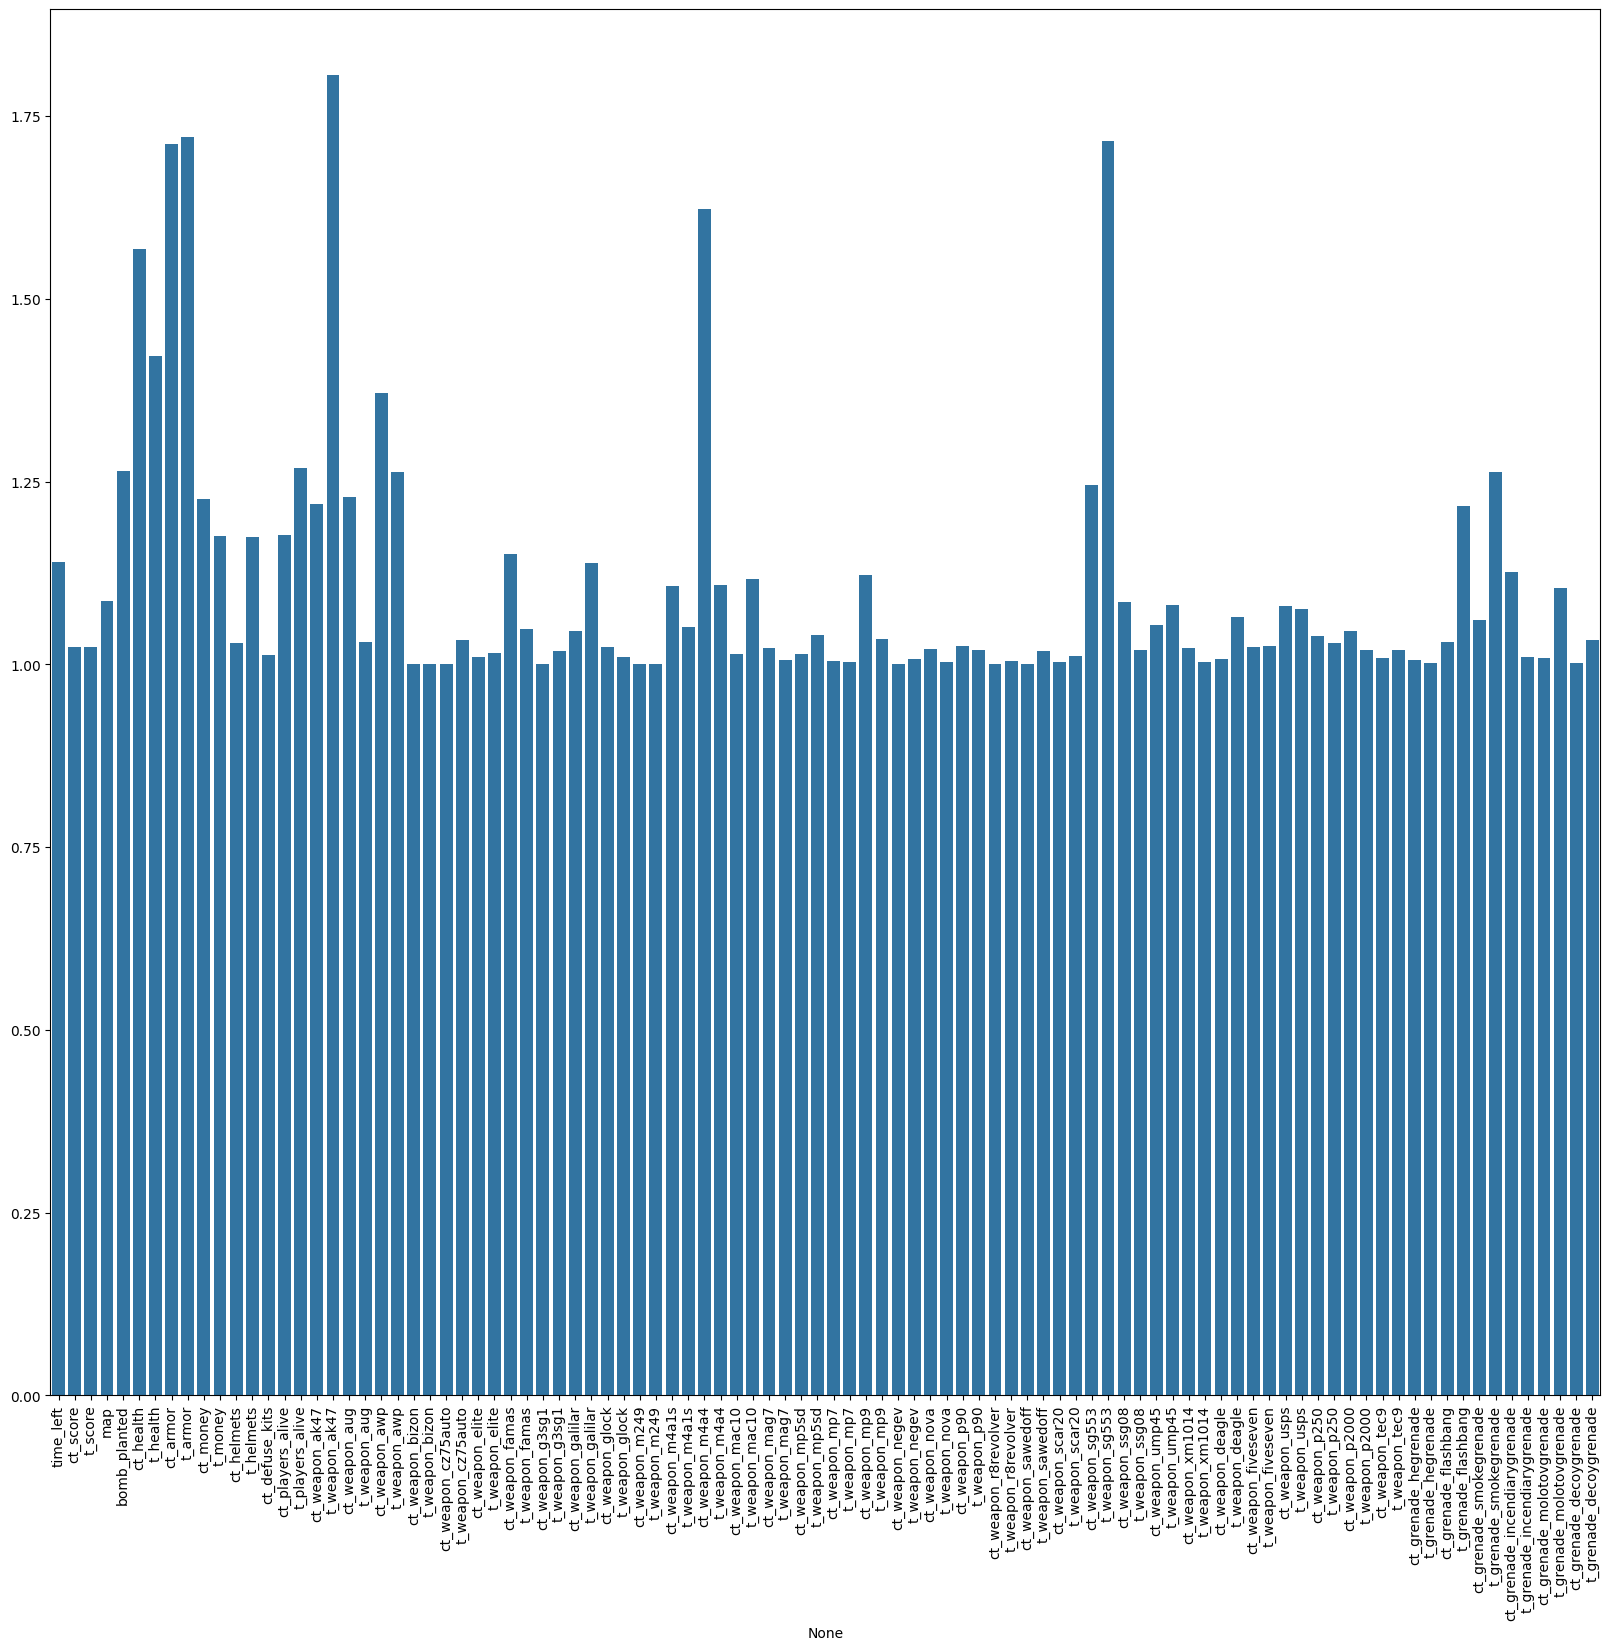

In [32]:
# same graph using sns
import seaborn as sns
plt.figure(figsize=(20, 18))
sns.barplot(x=X.columns, y=lda_coefficiants.flatten())
plt.xticks([x for x in range(len(X.columns))], X.columns, rotation='vertical')
plt.show()

In [34]:
# same graph using plotly
import plotly.express as px
px.bar(x=X.columns, y=lda_coefficiants.flatten()).show()

In [40]:
# selecting top 20 features based on lda coefficiants
lda_coeff_df = pd.DataFrame({
    'feature':X.columns, 'coefficiants': lda_coefficiants.flatten()
})
top_twenty_values = lda_coeff_df.nlargest(20, 'coefficiants')
top_twenty_values

,feature,coefficiants
17,t_weapon_ak47,1.805807
8,t_armor,1.721494
65,t_weapon_sg553,1.716493
7,ct_armor,1.711748
40,ct_weapon_m4a4,1.622804
5,ct_health,1.568964
6,t_health,1.422261
20,ct_weapon_awp,1.372082
15,t_players_alive,1.268888
4,bomb_planted,1.264437


In [42]:
#getting index of top twenty feaures
top_twenty_values.index

Index([17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14, 10,
       12],
      dtype='int64')

In [45]:
# selecting features in data
x_train = scaled_x_train[:, top_twenty_values.index]
x_test = scaled_x_test[:,top_twenty_values.index]

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

LogisticRegression()

In [47]:
y_pred = logistic_regression.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7517359692835552

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482

